# Assignment 3: Image Filtering

MIDS W281: Computer Vision

## Recommended Libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.color import rgb2gray
import skimage.io as skio

## Part 1: Convolution

![Convolution Teaser](images/convolution_teaser.png)

### Overview
A Gaussian filter reduces the high frequency content and retains mostly the low frequencies. When we convolve a Gaussian filter with an image, this is called low-pass filtering. Alternatively, if we want a high-pass image, we can subtract a low-pass filtered version from the original image to get only the high frequencies. 

An image often looks sharper if it has more high frequencies. We can increase the high-frequency content by adding the high-pass image to the original using a method called "unsharp mask filtering". In this part, you will create an "unsharp mask filter" that performs image sharpening. Perform your experiment on the [Taj.png](./images/taj.png) image, shown above.

### Description
1. Implement a python function to perform convolution given an image and a convolution kernel filter as inputs. The convolution kernel can be either a 2-D or 1-D kernel. The input image is grayscale (single channel). Do not use `scipy.ndimage.convolve` or any other equivalent function for convolution. Implement your own. Your function should return a convolved image of the same size as the input image. To handle the pixels at the edges of the image, obtain missing information by wrapping around to the opposite edge. For example, in order to compute the values in the first row, you will consider the values in the the *last* row, first row, and second row. Similarly, in order to compute the values in the first column, consider the values in the *last* column, first column, and second column.

2. Use the above convolution function to blur the Taj.png image [I] using the following Gaussian kernel [g], producing the output convolved image [I<sub>b</sub>]

 $$\begin{bmatrix} 0.0751 & 0.1238 & 0.0751 \\ 0.1238 & 0.2042 & 0.1238 \\ 0.0751 & 0.1238 & 0.0751 \end{bmatrix}$$
  &emsp;&emsp;
 
3. Subtract the blurred image [I<sub>b</sub>] from original image [I], to get the high frequency image: [I<sub>h</sub> = I - I<sub>b</sub>]. Then add the high frequency image [I<sub>h</sub>] back to the original [I] to get the unsharp mask image: [I<sub>s</sub> = I + I<sub>h</sub>]

4. Design a single convolution kernel [h] that will output the unsharp mask image [I<sub>s</sub>] when convolved with the original image [I]

5. Convolve the original image [I] with this kernel [h]. Let's call the output image [I'<sub>s</sub>].  

6. Compute the root mean square error (RMSE) between [I'<sub>s</sub>] and [I<sub>s</sub>].  Your error should be very close to zero (i.e. 10^-15 to 10^-16 floating point error, depending on your setup)
### Deliverables:

- Python code for convolution
- All three output images [I<sub>b</sub>, I<sub>s</sub>, I'<sub>s</sub>] and the unsharp mask convolution filter [h]
- Root mean square error between [I'<sub>s</sub>] and [I<sub>s</sub>]  ***(Use the provided, `rmse` function to calculate this)***

In [32]:
def rmse(img1, img2):
    """Calculate and return Root mean squared error"""
    return np.sqrt(np.mean(np.square(img1 - img2)))

In [33]:
# create a convolution function that takes in a grayscale image and a kernel as input
# and returns the convolved image (as a numpy array)

def convolution(in_im, h):
    
    # 1. Size computations
    kernel_height, kernel_width = h.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # 2. Padding the edge with columns and rows for edge convolutions
    pad_image = np.pad(in_im, ((pad_height, pad_height), (pad_width, pad_width)), mode='wrap')
    
    # 3. Create an empty image with the same size of in_im - lb (convolved image)
    I_b = np.zeros_like(in_im, dtype = np.float32)
    
    # 4. Flip the Kernel
    h_flip = np.flip(h, axis=(0,1))
    
    # 5. Iterations to compute convolutions
    for row_index in range(pad_height, pad_image.shape[0] - pad_height):
        for col_index in range(pad_width, pad_image.shape[1] - pad_width):
            conv_region = pad_image[
                                (row_index - pad_height):(row_index + pad_height + 1), 
                                (col_index - pad_width):(col_index + pad_width + 1)
                                    ]
            conv_value = np.sum(conv_region * h_flip)
            I_b[(row_index - pad_height), (col_index - pad_width)] = conv_value
    
    # 6. Return the convolution result
    return I_b
    

In [34]:
# use this cell (and more as needed) to implement your code and display + save the three output images:
# blurred image [I_b]
# sharpened image without convolution  [I_s]
# sharpened image with convolution [I_sp]

im_path = 'images/taj.png'
im = plt.imread(im_path)

# blurring filter provided by the assignment
h = np.array([[0.0751, 0.1238, 0.0751], 
              [0.1238, 0.2042, 0.1238],
              [0.0751, 0.1238, 0.0751]])

Data Type for im: float64
Data Type for im: float64
# === Kernel h === #
[[-0.0751 -0.1238 -0.0751]
 [-0.1238  1.7958 -0.1238]
 [-0.0751 -0.1238 -0.0751]]
RMSE for I_s & I_sp:  6.907704315999574e-09
# === Image display: I_b


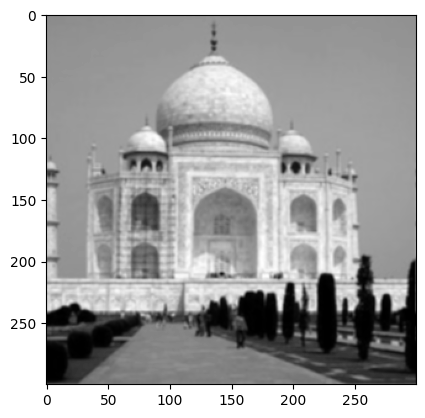

# === Image display: I_s


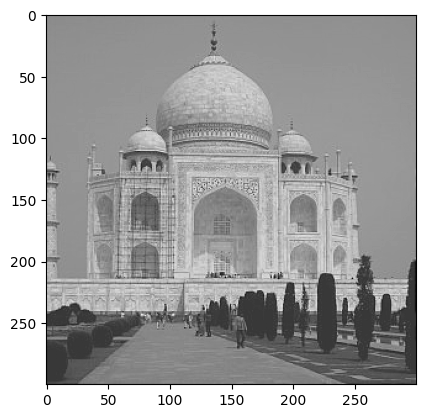

# === Image display: I_sp


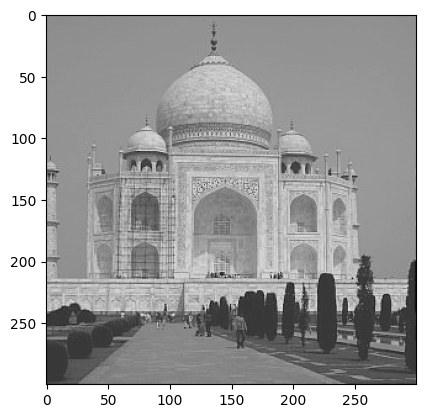

In [35]:
# 0. Data Type checking & convert to gray image
im= im.astype(np.float64)
h = h.astype(np.float64)
print("Data Type for im:", im.dtype)
print("Data Type for im:", h.dtype)
# 1. Convolution with h to get I_b
I_b = convolution(im, h)
# 2. Compute the I_s
I_s = im + im - I_b
# 3. Create a Kernel h_sp
Identity_kernel = np.array([[0, 0, 0], 
                            [0, 1, 0],
                            [0, 0, 0]], dtype = np.float64)
h_sp = 2 * Identity_kernel - h
# 4. Print Kernel h
print("# === Kernel h === #")
print(h_sp)
# 5. Compute I_sp
I_sp = convolution(im, h_sp)
# 6. Compute RMSE for I_s and I_sp
rmse_result = rmse(I_s, I_sp)
print("RMSE for I_s & I_sp: ", rmse_result)
# 7. Display Outcome for 3 images and kernel
print("# === Image display: I_b")
plt.imshow(I_b, cmap = "gray")
plt.show()
print("# === Image display: I_s")
plt.imshow(I_s, cmap = "gray")
plt.show()
print("# === Image display: I_sp")
plt.imshow(I_sp, cmap = "gray")
plt.show()

In [36]:
# 7. Save the 3 images
plt.imsave("Part_1_Output_I_b.png", I_b, cmap = "gray")
plt.imsave("Part_1_Output_I_s.png", I_s, cmap = "gray")
plt.imsave("Part_1_Output_I_sp.png", I_sp, cmap = "gray")
print("3 Images are saved locally in the same directory of this notebook.")

3 Images are saved locally in the same directory of this notebook.


## Part 2: Deconvolution

![Deconvolution Teaser](images/deconvolution_teaser.png)

### Overview
The process to reverse convolution is called deconvolution. Typically this requires some knowledge or estimate of how the convolved image was created (i.e. knowing or guessing the convolution filter). In this part you will estimate the original image from a convolved image and a known convolution filter. Because deconvolution is a memory intensive process, we will work with a 1-D kernel in this part.

### Description  

1. Start with the original image [I] and your convolution function from Part 1. First, blur the image [I] by convolving each row with the following 1-D kernel [g<sub>1</sub>] to produce a convolved image [I<sub>conv</sub>]
 $$\begin{bmatrix} 0.274 & 0.452 & 0.274 \end{bmatrix}$$  

2. Write a new python function `deconvolution` which takes in a grayscale image and a 1-D kernel and returns the original deconvolved image. For this, you will need to formulate the problem as 

 $$y=Ax$$
 
    where $y$ is an Nx1 vector derived from a row of the input image, $A$ is an NxN matrix constructed by repeating the 1-D kernel for each pixel, and $x$ is an Nx1 vector corresponding to the unknown row of the deconvolved image. N is the total number of pixels in one row of the image.

    ***Note that this formulation is only for one row, you must compute the original intensity for each row. Make sure to handle the boundary pixels correctly when constructing A (i.e. the first and the last rows of A). Use the same wrap-around method that was used Part 1. If the boundary conditions are not handled correctly, you will get artifacts in the resulting deconvolved image.***

3. Use your deconvolution method on [I<sub>conv</sub>] and [g<sub>1</sub>] to produce the output image [I<sub>deconv</sub>]

4. Compare the original image [I] and the deconvolved image [I<sub>deconv</sub>] in terms of root mean square error (RMSE). Your error should be very close to zero (i.e. 10^-13 to 10^-14 floating point error, depending on your setup)

### Deliverables:

 - Python code for deconvolution
 - Deconvolved image [I<sub>deconv</sub>]
 - Root mean square error between [I] and [I<sub>deconv</sub>]


In [37]:
# create a deconvolution function that takes in an image and a kernel as input
# and returns the deconvolved image (as a numpy array)

def deconvolution(in_im, h):

    # 1. Flip the kernel h
    h_inv = np.flip(h, axis = 0)
    
    # 2. Construct Matrix A
    A = np.zeros_like(in_im, dtype = np.float32)
    # === create row template for A
    row_template = np.concatenate((
                                    h_inv,
                                    np.array([[0]*(A.shape[1] - h_inv.shape[1])])
                                    ),axis = 1)
    # === sliding the row_template and add to the matrix of A
    for row_index in range(A.shape[0]):
        A[row_index, :] = np.roll(row_template, row_index, axis = 1)
    # === padding adjustment: wrap method
    A = np.roll(A, -1, axis = 1)
    # === Compute the inverse of Matrix A
    A_inv = np.linalg.inv(A)
    
    # 3. Create an empty matrix with the same size of input_image
    output = np.zeros_like(in_im, dtype = np.float32)
    
    # 4. Iterate to compute the row
    for row_index in range(output.shape[0]):
        y = in_im[row_index, :]
        x = A_inv @ y.T 
        output[row_index, :] = x

    # 5. Return the output
    return output

In [38]:
# use this cell (and more as needed) to implement your code and display + save the two output images:
# blurred image [I_conv]
# deconvolved image [I_deconv]
# RMSE between I and I_deconv

im_path = 'images/taj.png'
im = plt.imread(im_path)

# blurring filter provided by the assignment
h = np.array([0.274, 0.452, 0.274])

Data Type for im: float64
Data Type for im: float64
RMSE for I & I_deconv:  1.394548625381463e-06


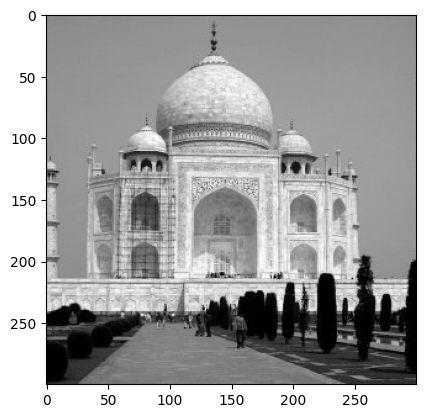

In [39]:
# 0. Data Type checking
im = im.astype(np.float64)
h = h.astype(np.float64)
print("Data Type for im:", im.dtype)
print("Data Type for im:", h.dtype)
# 1. Add Dimension to the kernel h
h = np.array([h])
# 2. Compute convolution
I_conv = convolution(im, h)
# 3. Compute deconvolution
I_deconv = deconvolution(I_conv, h)
# 4. Compute RMSE result
rmse_result_part_2 = rmse(im, I_deconv)
print("RMSE for I & I_deconv: ", rmse_result_part_2)
# 5. Display the image
plt.imshow(I_deconv, cmap = "gray")

In [40]:
# 6. Save the image locally
plt.imsave("Part_2_Output_I_deconv.png", I_deconv, cmap = "gray")
print("1 Image is saved locally in the same directory of this notebook.")

1 Image is saved locally in the same directory of this notebook.
